In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.pyfunc
from constants import *

In [2]:
# File path to the preprocessed data
FILENAME = "lichess_games_20K.pkl"

# Load data
df = pd.read_pickle(os.path.join(PREPROCESSED_DIR, FILENAME))

# Sort dataframe by 'encoded_eco'
df_sorted = df.sort_values(by="encoded_eco")

C:\Users\vujic\AppData\Local\Temp\ipykernel_7008\229073308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted["encoded_eco"].value_counts().index,
C:\Users\vujic\AppData\Local\Temp\ipykernel_7008\229073308.py:9: UserWarning: 
The palette list has fewer values (6) than needed (365) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df_sorted["encoded_eco"].value_counts().index,
C:\Users\vujic\AppData\Local\Temp\ipykernel_7008\229073308.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_eco_counts.index, y=top_10_eco_counts.values, palette=sns.color_palette("viridis"), ax=ax)
C:\Users\vujic\AppData\Local\Temp\ipykernel_7008\229073308.py:40: Use

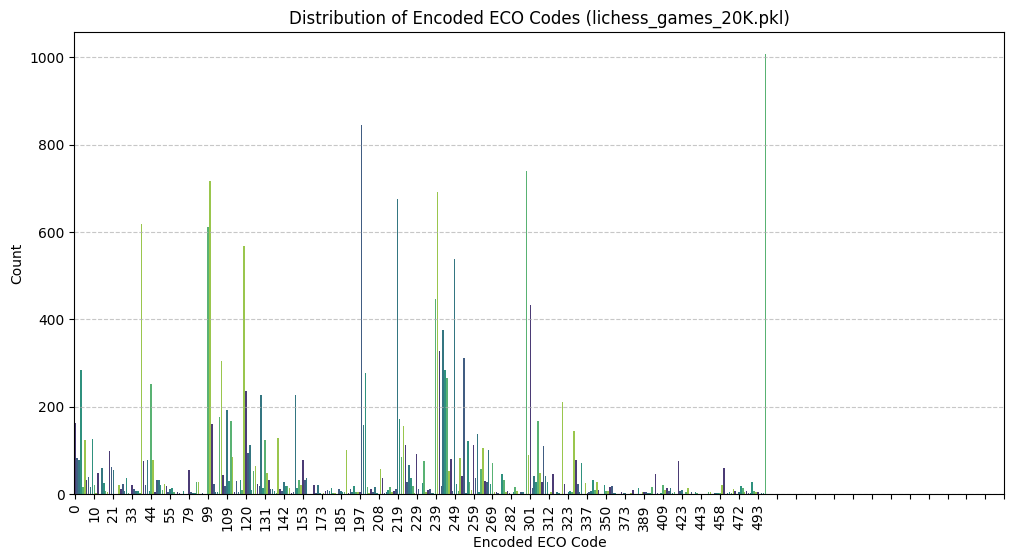

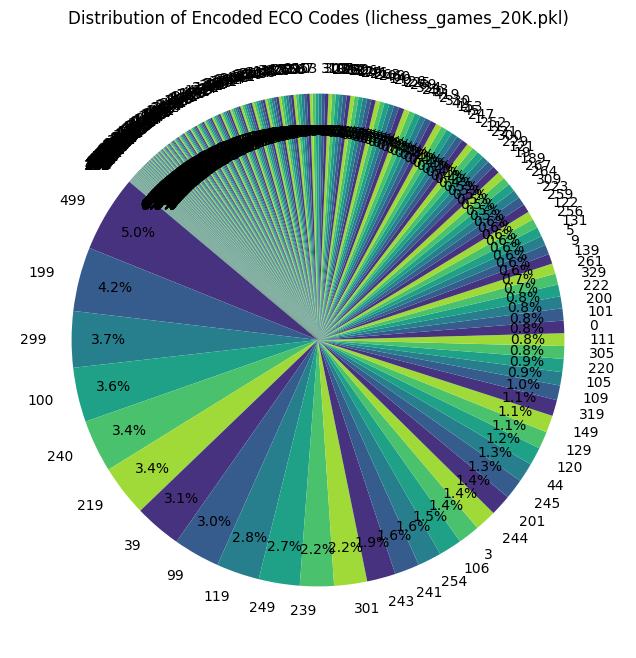

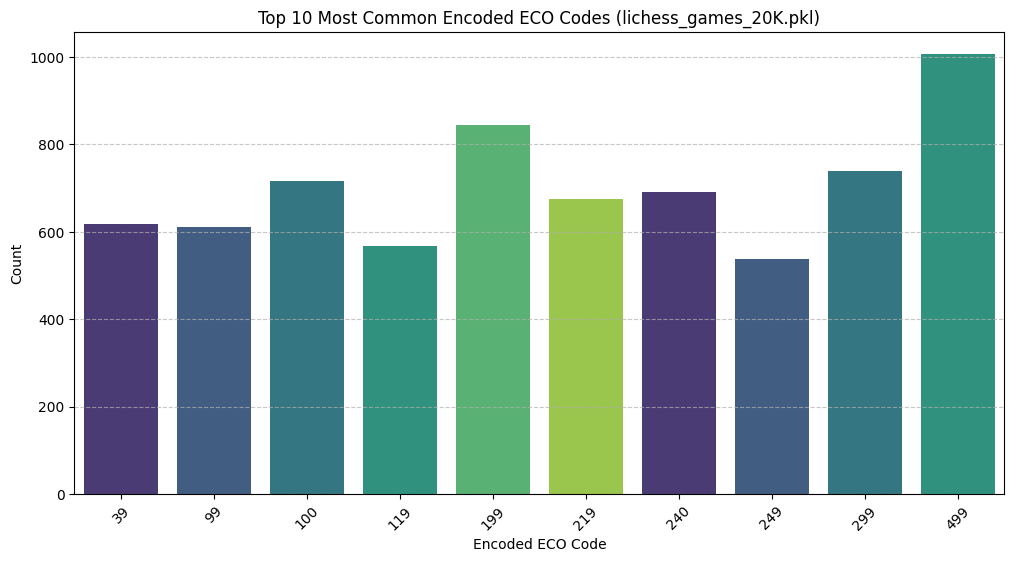

In [3]:
mlflow.set_experiment("Chess Dataset Charts")

with mlflow.start_run():
    # Log file parameter
    mlflow.log_param("filename", FILENAME)

    # Plot distribution of encoded_eco (Bar chart)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=df_sorted["encoded_eco"].value_counts().index, 
                y=df_sorted["encoded_eco"].value_counts().values, 
                order=df_sorted["encoded_eco"].unique(),
                palette=sns.color_palette("viridis"), ax=ax)
    ax.set_xticks(range(0, 500, 10))
    ax.set_xlabel("Encoded ECO Code")
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of Encoded ECO Codes ({FILENAME})")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Log the bar chart figure
    mlflow.log_figure(fig, "all_bar_chart.png")
    
    # Plot pie chart for distribution of encoded_eco
    fig, ax = plt.subplots(figsize=(8, 8))
    eco_counts = df['encoded_eco'].value_counts()
    ax.pie(eco_counts, 
           labels=eco_counts.index, 
           autopct='%1.1f%%', 
           startangle=140, 
           colors=sns.color_palette("viridis"),
           pctdistance=0.85)  # Move the percentages closer to the edge
    ax.set_title(f"Distribution of Encoded ECO Codes ({FILENAME})")

    # Log the pie chart figure
    mlflow.log_figure(fig, "eco_pie_chart.png")

    # Plot top 10 most common ECO codes (Bar chart)
    fig, ax = plt.subplots(figsize=(12, 6))
    top_10_eco_counts = eco_counts.head(10)
    sns.barplot(x=top_10_eco_counts.index, y=top_10_eco_counts.values, palette=sns.color_palette("viridis"), ax=ax)
    ax.set_xlabel("Encoded ECO Code")
    ax.set_ylabel("Count")
    ax.set_title(f"Top 10 Most Common Encoded ECO Codes ({FILENAME})")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Log the top 10 bar chart figure
    mlflow.log_figure(fig, "top_10_bar_chart.png")